In [2]:
import defi.defi_tools as dft
import pandas as pd
import matplotlib.pyplot as plt

#obtenemos serie 1
token1 = dft.geckoHistorical('bitcoin')
token1['token'] = 'btc' 
#eliminamos columnas que no nos sirven
token1 = token1.drop(['market_caps','total_volumes','token'],axis=1)
#renombramos columna de precio a btc_price
token1 = token1.rename(columns={'price':'btc_price'})

#obtenemos serie 1
token2 = dft.geckoHistorical('ethereum')
token2['token'] = 'ethereum' 
#eliminamos columnas que no nos sirven
token2 = token2.drop(['market_caps','total_volumes','token'],axis=1)
#renombramos columna de precio a eth_price
token2 = token2.rename(columns={'price':'eth_price'})

inner_join = pd.merge(token1,token2,on ='date',how ='inner')
inner_join['delta']=(inner_join.btc_price/inner_join.eth_price)

In [3]:
inner_join

,btc_price,eth_price,delta
date,,,
2015-08-07,278.508814,2.831620,98.356705
2015-08-08,259.800728,1.330750,195.228802
2015-08-10,263.578200,0.687586,383.338683
2015-08-11,269.866800,1.067379,252.831310
2015-08-12,267.712600,1.256613,213.042968
...,...,...,...
2022-06-17,20408.690491,1068.603575,19.098467
2022-06-18,20473.052881,1087.813924,18.820363
2022-06-19,19047.417828,995.252569,19.138275


In [4]:
inner_join.to_excel('btc_eth_prices.xlsx')

In [8]:
#Note: in the background, I have modified the excel file to change values (to 100000 for BTC and 15000 for ETH)
# Also, I modified at a second date, that both goes to 1
#Let's read the excel file now:

prices = pd.read_excel('btc_eth_prices.xlsx',index_col=[0])
prices

,btc_price,eth_price,delta
date,,,
2015-08-07,278.508814,2.831620,98.356705
2015-08-08,259.800728,1.330750,195.228802
2015-08-10,263.578200,0.687586,383.338683
2015-08-11,269.866800,1.067379,252.831310
2015-08-12,267.712600,1.256613,213.042968
...,...,...,...
2022-06-17,20408.690491,1068.603575,19.098467
2022-06-18,20473.052881,1087.813924,18.820363
2022-06-19,19047.417828,995.252569,19.138275


In [7]:
pd.read_excel?


<AxesSubplot:xlabel='date'>

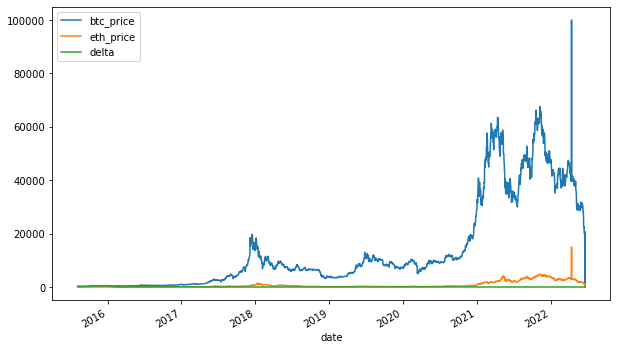

In [9]:
#Let's plot this out
prices.plot(kind='line',figsize=(10,6))

<AxesSubplot:xlabel='date'>

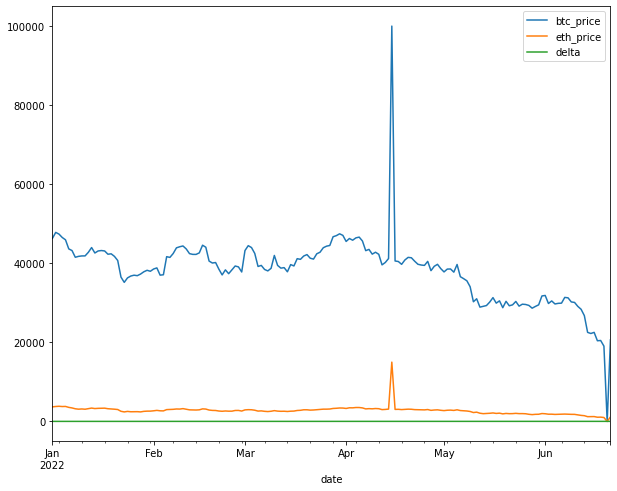

In [10]:
#now, let's locate where the discrepancies are:
prices.loc['2022-01-01':'2022-06-21'].plot(kind='line',figsize=(10,8))

<AxesSubplot:xlabel='date'>

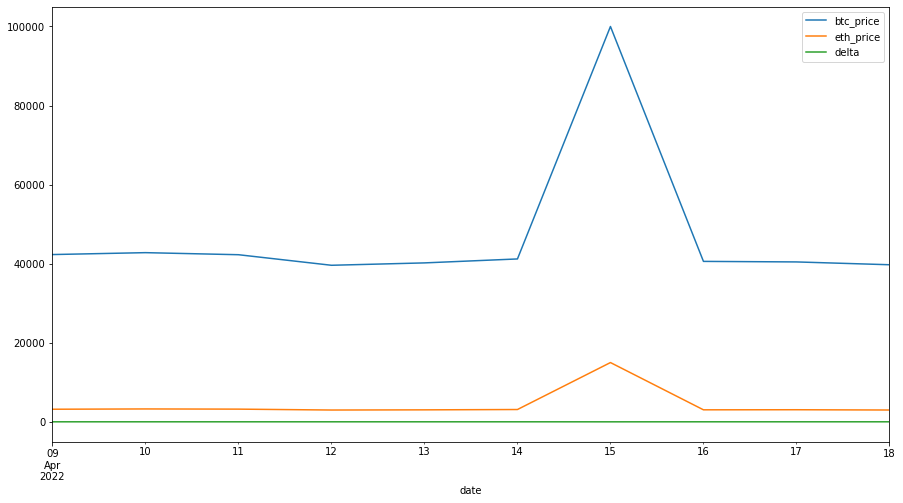

In [12]:
#we are getting closer... let's bring April dates and June
prices.loc['2022-04-09':'2022-04-18'].plot(kind='line',figsize=(15,8))

<AxesSubplot:xlabel='date'>

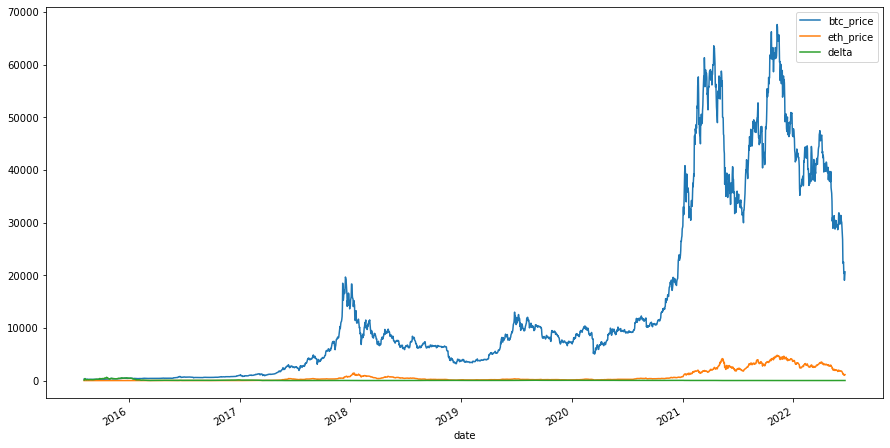

In [19]:
#now that we know that the issue is on 4/15/2022, we can get rid of that date
prices_clean = prices.drop(pd.to_datetime(['2022-04-15','2022-06-20']))
prices_clean.plot(kind='line',figsize=(15,8))

<AxesSubplot:ylabel='Frequency'>

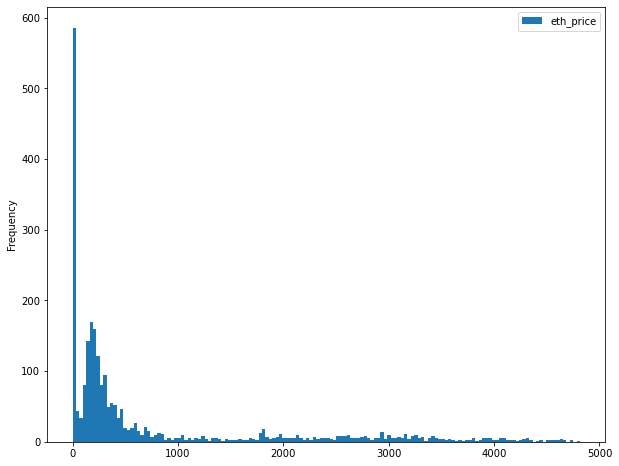

In [21]:
prices_clean.plot(kind='hist', y='eth_price', bins=150,figsize=(10,8))

<AxesSubplot:ylabel='Frequency'>

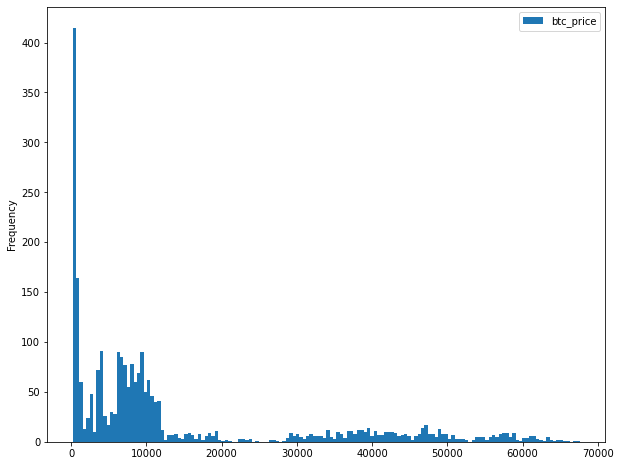

In [22]:
prices_clean.plot(kind='hist', y='btc_price', bins=150,figsize=(10,8))